In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import numpy as np
import requests
import base64
from bs4 import BeautifulSoup
import re

In [134]:
# Replace with your Client ID and Client Secret
client_id = "Gwf25D8OddE2kA0jeE--AXZ9o-VGyvD_co50DJzIEnTmsMzyzJwTfpHQt5MCy3p0"
client_secret = "uR60fdkDtUqCrERI_MOe6tUP3pZoyRBPxR6-v2OiLHvUlFmDcJ9TJ9A8Bb4A1txx8SmHDg-Tp5UH5xeFGLkWLg"
client_access_token = "Grr2tDc0yQTsbESQKEBBPQZVW2S1yKyWUyUfHZ0sVOerAjPphWE20UeL1pBB4P5m"

In [135]:
# Base URL for Genius API
base_url = "https://api.genius.com"

# Endpoint for searching
search_url = f"{base_url}/search"

# Search parameters
artists = ['Travis Scott', "The Kid LAROI", 'Kendrick Lamar', 'SZA', 'Drake', 'Kanye West', 'Juice WRLD', 'Playboi Carti']
lyrics_urls = {}

for artist in artists:
    params = {"q": f"{artist}"}

    # Headers with Authorization
    headers = {"Authorization": f"Bearer {client_access_token}"}

    # Make the request
    response = requests.get(search_url, headers=headers, params=params)

    # Parse and print results
    if response.status_code == 200:
        results = response.json()["response"]["hits"]

        for hit in results:
            title = hit["result"]["title"]
            artist = hit["result"]["primary_artist"]["name"]
            #print(f"{title} by {artist}")
            lyrics_urls[title] = (artist, hit['result']['url'])
    else:
        print("Error:", response.json())
    #print(lyrics_urls)

{'SICKO MODE': ('Travis Scott', 'https://genius.com/Travis-scott-sicko-mode-lyrics'), 'goosebumps': ('Travis Scott', 'https://genius.com/Travis-scott-goosebumps-lyrics'), 'BUTTERFLY EFFECT': ('Travis Scott', 'https://genius.com/Travis-scott-butterfly-effect-lyrics'), 'HIGHEST IN THE ROOM': ('Travis Scott', 'https://genius.com/Travis-scott-highest-in-the-room-lyrics'), 'Antidote': ('Travis Scott', 'https://genius.com/Travis-scott-antidote-lyrics'), 'STARGAZING': ('Travis Scott', 'https://genius.com/Travis-scott-stargazing-lyrics'), 'beibs in the trap': ('Travis Scott', 'https://genius.com/Travis-scott-beibs-in-the-trap-lyrics'), 'pick up the phone': ('Young Thug & Travis Scott', 'https://genius.com/Young-thug-and-travis-scott-pick-up-the-phone-lyrics'), '90210': ('Travis Scott', 'https://genius.com/Travis-scott-90210-lyrics'), 'FE!N': ('Travis Scott', 'https://genius.com/Travis-scott-fe-n-lyrics')}
{'SICKO MODE': ('Travis Scott', 'https://genius.com/Travis-scott-sicko-mode-lyrics'), 'go

In [136]:
lyrics_dict = {}

for song in lyrics_urls:
    # URL of the song's lyrics page
    url = lyrics_urls[song][1]

    # Send an HTTP GET request to fetch the page content
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        
        lyrics_div = soup.find("div", class_="Lyrics-sc-1bcc94c6-1 bzTABU")
        if lyrics_div:
            lyrics = lyrics_div.get_text(separator="\n").strip()
            lyrics_dict[song] = (lyrics_urls[song][0], lyrics)
            #=print(song)
        else:
            print("Lyrics not found!")
    else:
        print(f"Failed to fetch the page. Status code: {response.status_code}")

lyrics_dict

SICKO MODE
goosebumps
BUTTERFLY EFFECT
HIGHEST IN THE ROOM
Antidote
STARGAZING
beibs in the trap
pick up the phone
90210
FE!N
STAY
WITHOUT YOU
GO
TELL ME WHY
F*CK YOU, GOODBYE
Addison Rae
Diva
SO DONE
NOT FAIR
BABY I’M BACK
HUMBLE.
euphoria
Not Like Us
m.A.A.d city
Swimming Pools (Drank)
Money Trees
DNA.
XXX.
meet the grahams
Bitch, Don’t Kill My Vibe
Love Galore
The Weekend
Good Days
Kill Bill
All The Stars
Drew Barrymore
Broken Clocks
Garden (Say It Like Dat)
Doves in the Wind
Supermodel
God’s Plan
In My Feelings
Hotline Bling
One Dance
Hold On, We’re Going Home
Know Yourself
Back To Back
Family Matters
All Me
From Time
Mercy
Niggas in Paris
Monster
Father Stretch My Hands Pt. 1
Ultralight Beam
Bound 2
Clique
I Love It
No Church in the Wild
New Slaves
Lucid Dreams
All Girls Are the Same
Wishing Well
Robbery
Legends
Righteous
Bandit
Lean wit Me
Wasted
Smile
Magnolia
Timeless
wokeuplikethis*
Shoota
Long Time (Intro)
Type Shit
Sky
H00DBYAIR
Not Real (Version 1)
Miss the Rage


{'SICKO MODE': ('Travis Scott',
  "[Part I]\n[Intro: Drake]\nAstro, yeah\n[Verse: Drake]\nSun is down, freezin' cold\nThat's how we already know, winter's here\nMy dawg would probably do it for a Louis belt\nThat's just all he know, he don't know nothin' else\nI tried to show 'em, yeah\nI tried to show 'em, yeah, yeah\nYeah, yeah, yeah\nGoin' on you with the pick and roll\nYoung La Flame, he in sicko mode\n[Part II]\n[Verse 1: Travis Scott & \nThe Notorious B.I.G\n.\n]\n(Woo) Made this here with all the ice on in the booth\nAt the gate outside, when they pull up, they get me loose\nYeah, Jump Out boys, that's Nike boys, hoppin' out coupes\nThis shit way too big, when we pull up, give me the loot (\nGimme the loot!\n)\nWas off the Remy, had a Papoose\nHad to hit my old town to duck the news\nTwo-four hour lockdown, we made no moves\nNow it's 4 a.m. and I'm back up poppin' with the crew\nI just landed in, Chase B mixes pop like Jamba Juice\nDifferent colored chains, think my jeweler real

In [145]:
print(lyrics_dict.keys())

dict_keys(['SICKO MODE', 'goosebumps', 'BUTTERFLY EFFECT', 'HIGHEST IN THE ROOM', 'Antidote', 'STARGAZING', 'beibs in the trap', 'pick up the phone', '90210', 'FE!N', 'STAY', 'WITHOUT YOU', 'GO', 'TELL ME WHY', 'F*CK YOU, GOODBYE', 'Addison Rae', 'Diva', 'SO DONE', 'NOT FAIR', 'BABY I’M BACK', 'HUMBLE.', 'euphoria', 'Not Like Us', 'm.A.A.d city', 'Swimming Pools (Drank)', 'Money Trees', 'DNA.', 'XXX.', 'meet the grahams', 'Bitch, Don’t Kill My Vibe', 'Love Galore', 'The Weekend', 'Good Days', 'Kill Bill', 'All The Stars', 'Drew Barrymore', 'Broken Clocks', 'Garden (Say It Like Dat)', 'Doves in the Wind', 'Supermodel', 'God’s Plan', 'In My Feelings', 'Hotline Bling', 'One Dance', 'Hold On, We’re Going Home', 'Know Yourself', 'Back To Back', 'Family Matters', 'All Me', 'From Time', 'Mercy', 'Niggas in Paris', 'Monster', 'Father Stretch My Hands Pt. 1', 'Ultralight Beam', 'Bound 2', 'Clique', 'I Love It', 'No Church in the Wild', 'New Slaves', 'Lucid Dreams', 'All Girls Are the Same', 'Wi

In [146]:
lyrics_df.tail(10)

,Song,Lyrics,Artist
70,Magnolia,"(Playboi Carti, [Intro: Playboi Carti & \nJami...",Playboi Carti
71,Timeless,"(The Weeknd & Playboi Carti, [Intro: The Weekn...",The Weeknd & Playboi Carti
72,wokeuplikethis*,"(Playboi Carti, [Intro: Lil Uzi Vert]\nKnow I ...",Playboi Carti
73,Shoota,"(Playboi Carti, [Intro: Lil Uzi Vert]\nYeah\nN...",Playboi Carti
74,Long Time (Intro),"(Playboi Carti, [Intro]\nFeel like, bitch, hel...",Playboi Carti
75,Type Shit,"(Future, [Intro: Future]\nYeah, yeah, Pluto\n[...",Future
76,Sky,"(Playboi Carti, [Intro]\nWhat? What? What? Wha...",Playboi Carti
77,H00DBYAIR,"(Playboi Carti, [Intro]\nUh, you gotta get hig...",Playboi Carti
78,Not Real (Version 1),"(Playboi Carti, [Intro]\n(Blatt)\n[Chorus]\nYe...",Playboi Carti
79,Miss the Rage,"(Trippie Redd & Playboi Carti, [Intro: Trippie...",Trippie Redd & Playboi Carti


In [147]:
def filter_valid_artists(artist_string, valid_artists):
    temp_artists = [artist.strip() for artist in re.split(r"[&,]", artist_string)]
    valid_only = [artist for artist in temp_artists if artist in valid_artists]
    #print(artist_string, valid_only)
    return valid_only[0]

In [148]:
def clean_lyrics(lyrics):
    lyrics = re.sub(r'\[.*?\]', '', lyrics)
    lyrics = lyrics.replace('\n', ' ')
    return lyrics.strip()

In [151]:
lyrics_dict['Niggas in Paris'] = ('Kanye West', lyrics_dict['Niggas in Paris'][1])
lyrics_dict['No Church in the Wild'] = ('Kanye West', lyrics_dict['No Church in the Wild'][1])
lyrics_dict['Type Shit'] = ('Playboi Carti', lyrics_dict['Type Shit'][1])

lyrics_df = pd.DataFrame(list(lyrics_dict.items()), columns=['Song', 'Lyrics'])
lyrics_df['Artist'] = lyrics_df['Lyrics'].apply(lambda x: x[0])
lyrics_df['Artist'] = lyrics_df['Artist'].apply(lambda x: filter_valid_artists(x, artists))
lyrics_df['Lyrics'] = lyrics_df['Lyrics'].apply(lambda x: x[1].lower().replace(',', '').replace('(', '').replace(')', '').replace('?', ''))
lyrics_df['Lyrics'] = lyrics_df['Lyrics'].apply(clean_lyrics)
lyrics_df

,Song,Lyrics,Artist
0,SICKO MODE,astro yeah sun is down freezin' cold that's h...,Travis Scott
1,goosebumps,yeah 7:30 in the night yeah ooh ooh i get tho...,Travis Scott
2,BUTTERFLY EFFECT,all the commas murda on the beat so it's not...,Travis Scott
3,HIGHEST IN THE ROOM,i got room in my fumes yeah she fill my mind u...,Travis Scott
4,Antidote,don't you open up that window don't you let ou...,Travis Scott
...,...,...,...
75,Type Shit,yeah yeah pluto i don't hang with rats that's...,Playboi Carti
76,Sky,what what what what i'm so high man i can't ev...,Playboi Carti
77,H00DBYAIR,uh you gotta get high like this you gotta get ...,Playboi Carti
78,Not Real (Version 1),blatt yeah look at these diamonds they shinin...,Playboi Carti


[('like', np.float64(3.883878213208283)), ('know', np.float64(3.590272190854817)), ('got', np.float64(3.313974248182976)), ('bitch', np.float64(2.668484061544289)), ('want', np.float64(2.612883405313883)), ('time', np.float64(2.370114483235165)), ('let', np.float64(1.646642697315468)), ('baby', np.float64(1.6132274929851607)), ('skrrt', np.float64(1.0599517763479518)), ('pop', np.float64(1.059814275665432)), ('night', np.float64(0.8049811586362297)), ('lit', np.float64(0.6533270768596875)), ('straight', np.float64(0.5785634974096563)), ('door', np.float64(0.5247774697800975)), ('travis', np.float64(0.44400473296632437))]


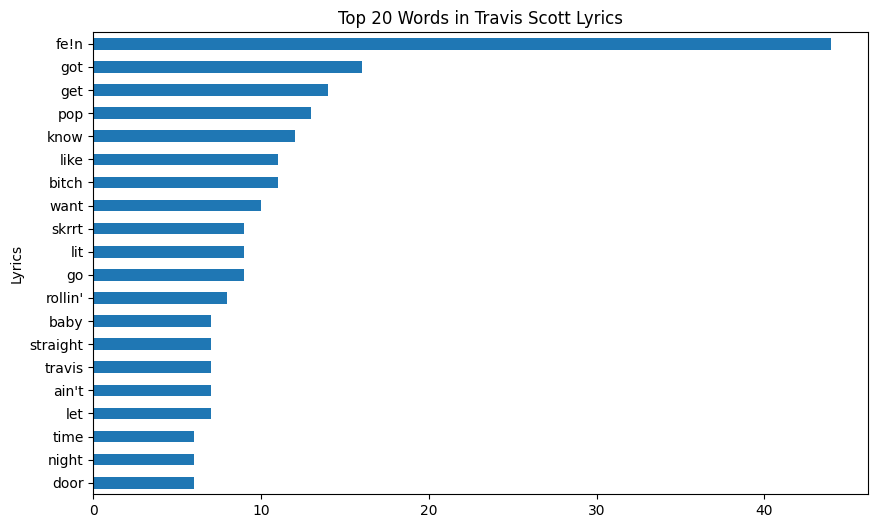

[('like', np.float64(3.883878213208283)), ('know', np.float64(3.590272190854817)), ('got', np.float64(3.313974248182976)), ('need', np.float64(2.8249833434636518)), ('bitch', np.float64(2.668484061544289)), ('shit', np.float64(2.6303330691731857)), ('time', np.float64(2.370114483235165)), ('woah', np.float64(2.1010406655430067)), ('tell', np.float64(2.044779632525589)), ('fuck', np.float64(2.0209607481808973)), ('bad', np.float64(1.2119367238588077)), ('okay', np.float64(1.2006472990451524)), ('told', np.float64(1.0240200422003174)), ('shawty', np.float64(0.8748136203411824)), ('prone', np.float64(0.7689062206060956))]


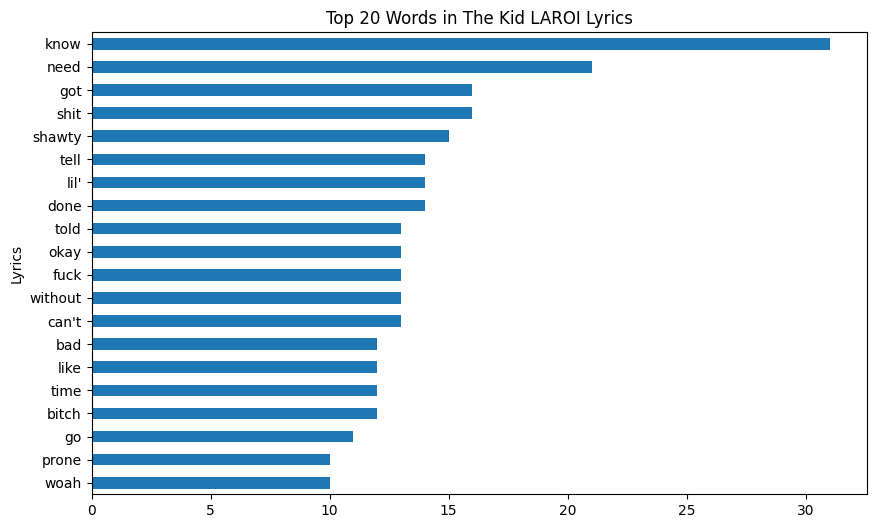

[('like', np.float64(3.883878213208283)), ('know', np.float64(3.590272190854817)), ('got', np.float64(3.313974248182976)), ('bitch', np.float64(2.668484061544289)), ('nigga', np.float64(2.0696153030319504)), ('tell', np.float64(2.044779632525589)), ('fuck', np.float64(2.0209607481808973)), ('feel', np.float64(1.804166052577017)), ('hold', np.float64(1.713169830979686)), ('make', np.float64(1.6505502190718637)), ('inside', np.float64(1.0346522902693494)), ('kill', np.float64(0.8224172389609552)), ('sit', np.float64(0.7603656578319401)), ('wop', np.float64(0.7130467276042269)), ('bish', np.float64(0.696291000909201)), ('dna', np.float64(0.6619673682707503))]


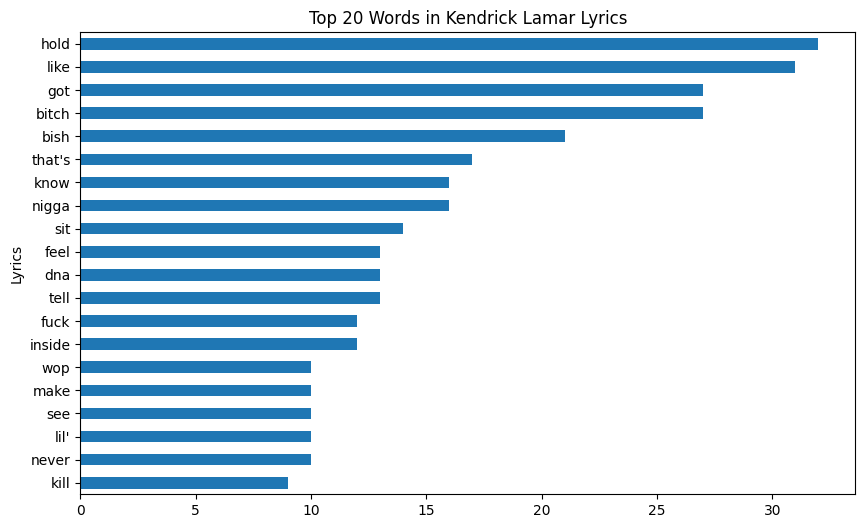

[('love', np.float64(4.131200193513106)), ('like', np.float64(3.883878213208283)), ('know', np.float64(3.590272190854817)), ('got', np.float64(3.313974248182976)), ('need', np.float64(2.8249833434636518)), ('want', np.float64(2.612883405313883)), ('man', np.float64(1.9437382696006245)), ('say', np.float64(1.7862710353345488)), ('niggas', np.float64(1.7071612016970201)), ('baby', np.float64(1.6132274929851607)), ('mind', np.float64(1.3631762646814596)), ('new', np.float64(1.0771749396227879)), ('pussy', np.float64(1.043093552323933)), ('day', np.float64(0.9598193784606877))]


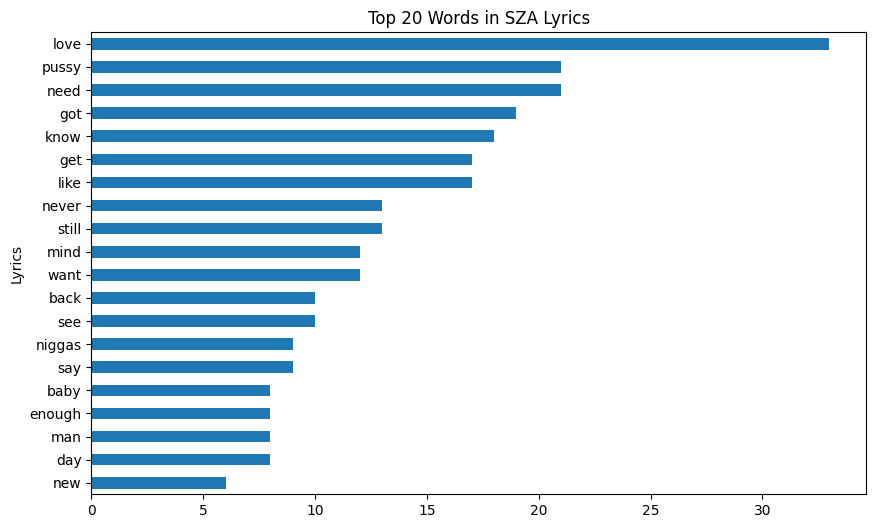

[('love', np.float64(4.131200193513106)), ('like', np.float64(3.883878213208283)), ('know', np.float64(3.590272190854817)), ('got', np.float64(3.313974248182976)), ('need', np.float64(2.8249833434636518)), ('shit', np.float64(2.6303330691731857)), ('want', np.float64(2.612883405313883)), ('nigga', np.float64(2.0696153030319504)), ('man', np.float64(1.9437382696006245)), ('make', np.float64(1.6505502190718637)), ('really', np.float64(1.357765690000829)), ('gotta', np.float64(1.2888708963688966))]


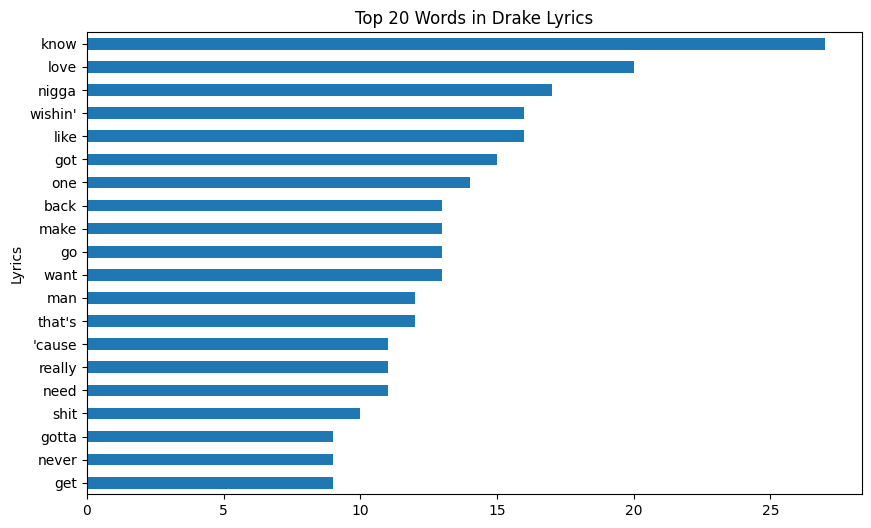

[('love', np.float64(4.131200193513106)), ('like', np.float64(3.883878213208283)), ('know', np.float64(3.590272190854817)), ('got', np.float64(3.313974248182976)), ('need', np.float64(2.8249833434636518)), ('bitch', np.float64(2.668484061544289)), ('shit', np.float64(2.6303330691731857)), ('want', np.float64(2.612883405313883)), ('wanna', np.float64(1.8333243611563668)), ('say', np.float64(1.7862710353345488)), ('hard', np.float64(1.3737018291878709)), ('god', np.float64(1.1993477661150451)), ('chill', np.float64(0.9600633385416654)), ('clique', np.float64(0.8588194352562826)), ('yes', np.float64(0.7990767695795542))]


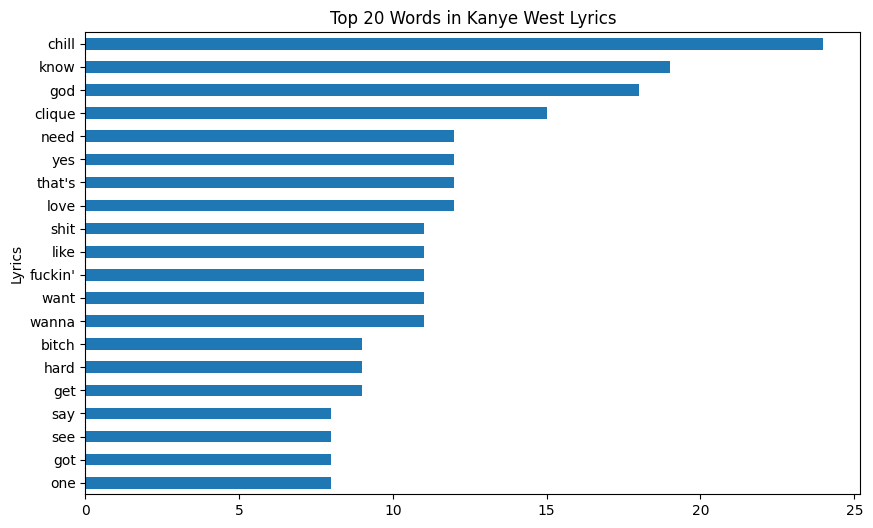

[('love', np.float64(4.131200193513106)), ('like', np.float64(3.883878213208283)), ('know', np.float64(3.590272190854817)), ('need', np.float64(2.8249833434636518)), ('shit', np.float64(2.6303330691731857)), ('want', np.float64(2.612883405313883)), ('time', np.float64(2.370114483235165)), ('tell', np.float64(2.044779632525589)), ('fuck', np.float64(2.0209607481808973)), ('feel', np.float64(1.804166052577017)), ('wasted', np.float64(1.2543114814834015)), ('real', np.float64(1.037555815757289)), ('heart', np.float64(0.9513169181344938)), ('drugs', np.float64(0.679685795969802))]


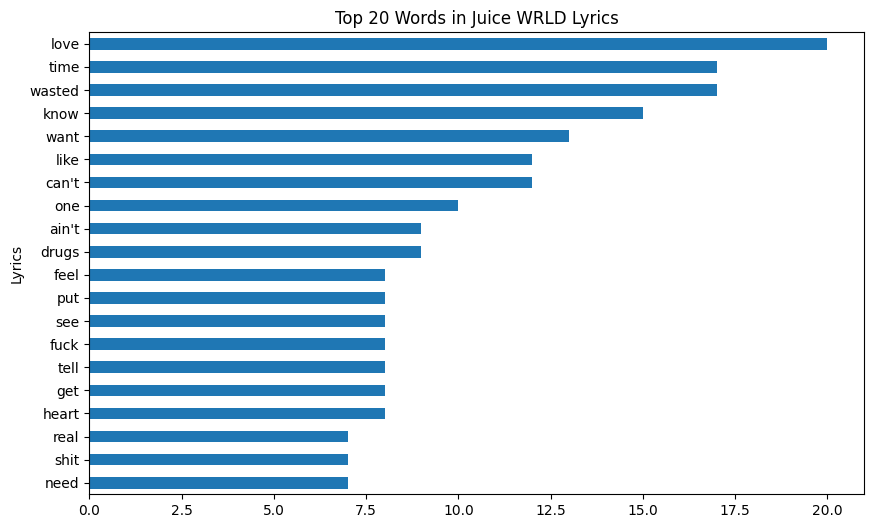

[('like', np.float64(3.883878213208283)), ('know', np.float64(3.590272190854817)), ('got', np.float64(3.313974248182976)), ('bitch', np.float64(2.668484061544289)), ('shit', np.float64(2.6303330691731857)), ('woah', np.float64(2.1010406655430067)), ('fuck', np.float64(2.0209607481808973)), ('wanna', np.float64(1.8333243611563668)), ('feel', np.float64(1.804166052577017)), ('hold', np.float64(1.713169830979686)), ('niggas', np.float64(1.7071612016970201)), ('slatt', np.float64(1.3239514612977845)), ('high', np.float64(1.3072768320530905)), ('gotta', np.float64(1.2888708963688966)), ('drop', np.float64(1.2471239371509297)), ('type', np.float64(1.0114424213325985)), ('carti', np.float64(0.5146238320628114))]


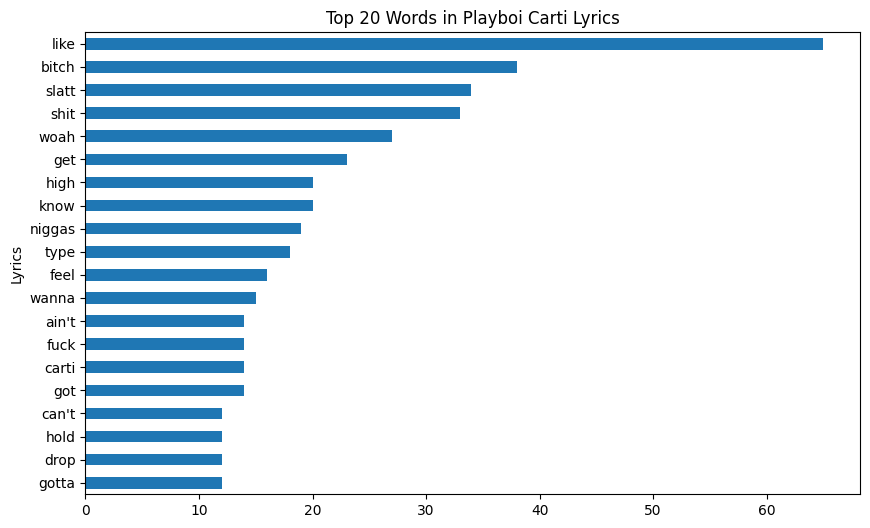

[(('Kanye West', 'yes'), np.float64(0.6)), (('SZA', 'baby'), np.float64(0.2558060775203632)), (('SZA', 'still'), np.float64(0.24095487845487848)), (('Kanye West', 'chill'), np.float64(0.23475378787878787)), (('Kendrick Lamar', 'bish'), np.float64(0.2102941176470588)), (('SZA', 'niggas'), np.float64(0.1839662698412698)), (('Travis Scott', "ain't"), np.float64(0.17832015937279097)), (('Kanye West', 'want'), np.float64(0.17394638347763347)), (('SZA', 'got'), np.float64(0.1629984370787942)), (('SZA', 'want'), np.float64(0.1622861652236652)), (('SZA', 'love'), np.float64(0.1601685121895648)), (('SZA', 'enough'), np.float64(0.15904916512059367)), (('SZA', 'day'), np.float64(0.15575674325674327)), (('Kanye West', 'need'), np.float64(0.1507327741702742)), (('SZA', 'get'), np.float64(0.14827432073833793)), (('Kanye West', 'god'), np.float64(0.14583333333333334)), (('Travis Scott', 'let'), np.float64(0.1434894608315661)), (('SZA', 'need'), np.float64(0.14211549540684879)), (('SZA', 'mind'), np.f

In [154]:
#from nltk module
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "you're", "you've", 
    "you'll", "you'd", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
    "she", "she's", "her", "hers", "herself", "it", "it's", "its", "itself", "they", "them", 
    "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "that'll", 
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", 
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", 
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", 
    "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", 
    "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", 
    "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", 
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", 
    "too", "very", "s", "t", "can", "will", "just", "don", "don't", "should", "should've", "now", 
    "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "aren't", "couldn", "couldn't", "didn", 
    "didn't", "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't", "isn", 
    "isn't", "ma", "mightn", "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't", 
    "shouldn", "shouldn't", "wasn", "wasn't", "weren", "weren't", "won", "won't", "wouldn", "wouldn't",
    '(', ')', '[', ']', '&', 'uh', 'yeah', 'ooh', 'ah', 'ya', 'oh', "i'm", "i'ma"
]

all_lyrics = lyrics_df['Lyrics']
sentiment_scores = {}

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(all_lyrics)
feature_names = vectorizer.get_feature_names_out()


for artist in lyrics_df['Artist'].unique():
    temp = lyrics_df[lyrics_df['Artist'] == f'{artist}']['Lyrics'].str.split().explode().value_counts()
    temp = temp[~temp.index.isin(stop_words)]
    top_words = temp.head(20)

    # Find the TF-IDF scores for the top 20 words
    tfidf_scores = {word: tfidf_matrix[:, feature_names.tolist().index(word)].sum() for word in top_words.index if word in feature_names}
    sorted_tfidf = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
    print(sorted_tfidf)

    #Sentiment Analysis for top words in context
    for word in top_words.index:
        artist_df = lyrics_df[lyrics_df['Artist'] == artist]
        matching_lyrics = artist_df[artist_df['Lyrics'].str.contains(rf'\b{re.escape(word)}\b', case=False, na=False)]
        sentiment_scores[(artist, word)] = matching_lyrics['Lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity).mean()

    # Create the horizontal bar chart
    top_words.plot(kind='barh', figsize=(10, 6))
    plt.title(f'Top 20 Words in {artist} Lyrics')
    plt.gca().invert_yaxis() 
    plt.show()


filtered_sentiment_scores = {k: v for k, v in sentiment_scores.items() if not np.isnan(v)}
sorted_sentiment = sorted(filtered_sentiment_scores.items(), key=lambda x: x[1], reverse=True)
print(sorted_sentiment)